# Implementation of Shaffer et al

In [1]:
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

# https://www.nature.com/nature/journal/v546/n7658/abs/nature22794.html

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

In [2]:
# Hint: You can get 50 normally-distributed random numbers all at once:
# x = np.random.normal(mean, standard_deviation, size=50)
mu = 5
std = 1

stdev_sample = np.zeros(50)

# Explore how this works. It uses array processing along an axis to avoid an additional loop
# for the repeated sampling.
for n in range(50):
    sample_data = np.random.normal(mu, std, size=(n + 1, 1000))

    # axis=0 means only take the mean across that axis
    sample_mean = np.mean(sample_data, axis=0)
    assert sample_mean.shape == (1000,)

    # Now we can take the standard deviation across the remaining axis
    stdev_sample[n] = np.std(sample_mean)


#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

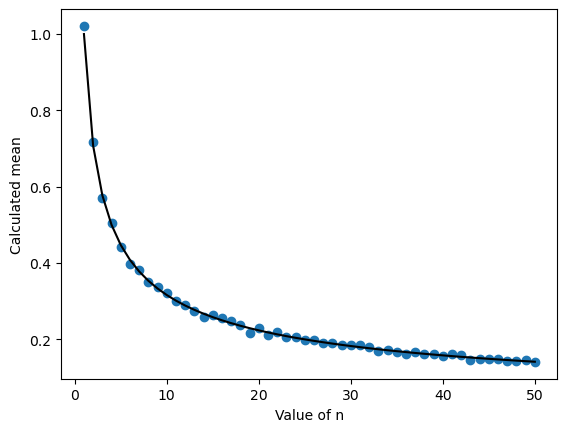

In [3]:
## This shows that the higher n is, the greater our power to accurately estimate the underlying mean
## (the standard deviation of the sample mean decreases approximately along the same line as 1/sqrt(n) as n increases)

# plt.scatter(x, y) and plt.plot(x, y) will give you scatter and line plots
xval = list(range(1,51))

yval = stdev_sample

plt.scatter(xval, yval)
plt.xlabel('Value of n')
plt.ylabel('Calculated mean')
plt.plot(xval, 1/np.sqrt(xval), color="black")

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

**Both give us information on how there are trends as we increase in sample size - the general trend of how as n increases, the average variation of our data decreases (shown by decrease in std above, and decrease in box height below). Specifically, the boxplot shows us how the sample means are distributed for each sample size, with the quartiles, ranges, and outliers - and the central tendency (towards 5). The scatterplot gives us a more general outlook on how the standard deviation shrinks logarithimically as n increases, and how the std movees from 1 to closer to 0.**

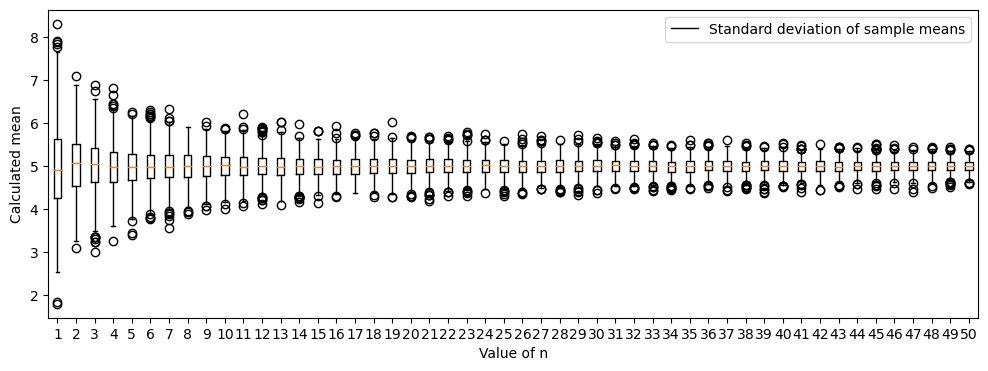

In [4]:
# Hint: You'll want to look at plt.boxplot(sample_mean), where sample_mean is a 2D array.

#setting up an empty array
sample_means = []

for n in range(50):
    sample_data = np.random.normal(mu, std, size=(n + 1, 1000))
    sample_mean = np.mean(sample_data, axis=0)
    #a 3d array with all of these arrays of sample_mean, one for each n
    sample_means.append(sample_mean)

# Making the boxplot pretty
fig, ax = plt.subplots(figsize=(12, 4))
ax.boxplot(sample_means, widths=0.4,)
plt.xlabel('Value of n')
plt.ylabel('Calculated mean')
plt.legend(["Standard deviation of sample means"])


# Show the plot
plt.show()


#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

**It looks kind-of normal, with (after running it a few times), the ks statistic being about 0.02, and the p-value consistently being > 0.80, which suggests that I would fail to reject the null hypothesis.**

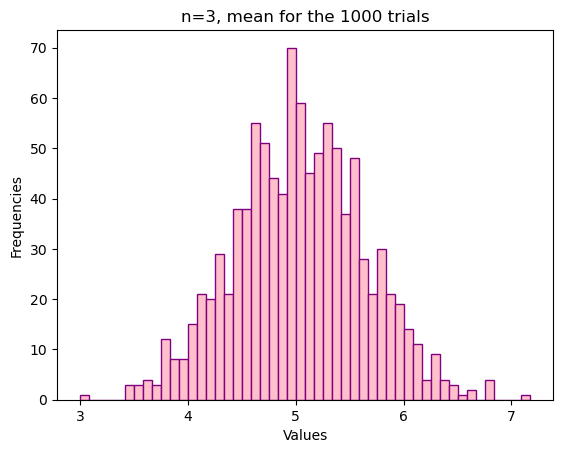

The sample mean is:  5.034433339942075
The sample std is:  0.6047866616016438
The ks statistics is  0.014273926103831436
The p value for the ks test is 0.9852546796516253


In [5]:
# Answer to 1c here
sample_data = np.random.normal(mu, std, size=(3, 1000))
sample_mean = np.mean(sample_data, axis=0)

plt.hist(sample_mean, bins=50, color='pink', edgecolor='purple')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title('n=3, mean for the 1000 trials')
plt.show()


#some calculations
sample_mean_answer = np.mean(sample_mean)
sample_std_answer = np.std(sample_mean)
print("The sample mean is: ", sample_mean_answer)
print("The sample std is: ", sample_std_answer)

zscore_sample_means = zscore(sample_mean)

stat, pvalue = kstest(zscore_sample_means, 'norm') #will return the ks statistic and p-value for the KS test against the standard normal distribution.
print("The ks statistics is ", stat)
print("The p value for the ks test is", pvalue)
# It looks kind-of normal, with (after running it a few times),
# the ks statistic being about 0.02, and the p-value consistently being > 0.60,
# which suggests that I would fail to reject the null hypothesis.

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

**It looks kind-of normal, with (after running it a few times), the ks statistic decreasing to about 0.015, and the p-value consistently being > 0.60, which suggests that I would fail to reject the null hypothesis by far, with any reasonable threshold.
When the number of samples increases, the mean remains around the same, while the distribution becomes narrower, more closely resembling a normal distribution.**

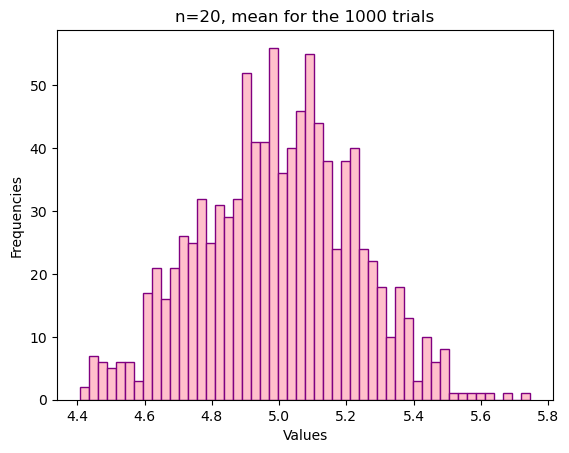

The sample mean is:  4.995304197962887
The sample std is:  0.22885382506541382
The ks statistics is  0.020508164436934373
The p value for the ks test is 0.7862558549524961


In [6]:
# Answer to 1d here
sample_data = np.random.normal(mu, std, size=(20, 1000))
sample_mean = np.mean(sample_data, axis=0)

plt.hist(sample_mean, bins=50, color='pink', edgecolor='purple')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title('n=20, mean for the 1000 trials')
plt.show()

#some calculations
sample_mean_answer = np.mean(sample_mean)
sample_std_answer = np.std(sample_mean)
print("The sample mean is: ", sample_mean_answer)
print("The sample std is: ", sample_std_answer)

zscore_sample_means = zscore(sample_mean)

stat, pvalue = kstest(zscore_sample_means, 'norm') #will return the ks statistic and p-value for the KS test against the standard normal distribution.
print("The ks statistics is ", stat)
print("The p value for the ks test is", pvalue)


## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

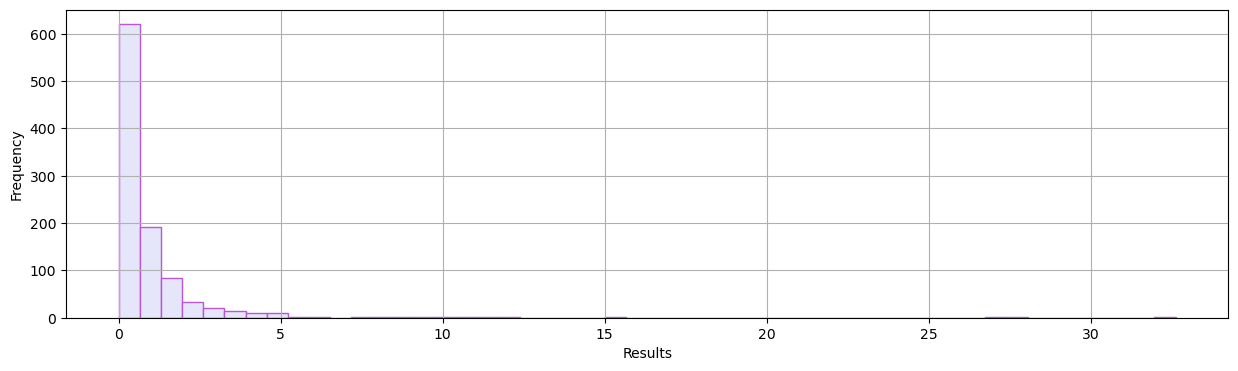

In [7]:
# Answer 2a here
values = np.random.pareto(2, 1000)
plt.figure(figsize=(15, 4))
plt.hist(values, bins=50, color='lavender', edgecolor='mediumorchid') #will make a histogram with 30 bins
plt.xlabel("Results")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## This histogram looks like it has a very large vertical spike at the beginning, and then quickly peters out to nothing.
## It looks nothing like the normal distribution.

#### 2b. What do you expect the sample distribution of the mean to look like for n=2. Just like a Pareto distribution, normal distribution, or something else? You can make a plot if you would like, but don't have to.

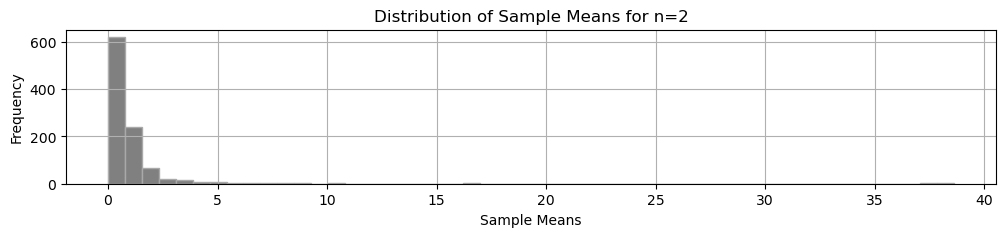

In [8]:
n = 2

number_of_samples = 1000

sample_means = np.mean(np.random.pareto(2, (number_of_samples, n)), axis=1)

#  histogram to plot the stuffs
plt.figure(figsize=(12, 2))
plt.hist(sample_means, bins=50, color='gray', edgecolor='darkgrey')
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title(f"Distribution of Sample Means for n=2")
plt.grid(True)
plt.show()

**I expect the sample distribution of the mean to look closer to the original Pareto distribution, because when n=2, the Central Limit Theorem says that we shouldn't expect it to look like a normal distribution yet, but more like its parent function. Why? Because that's what the Professor said :D**

#### 2c. How about for n=1,000,000?

**I expect the sample distribution of the mean to look closer to a normal distribution, because when n=1,000,000 (this is a very big number), the Central Limit Theorem tells us that when n = very big, the means resemble a normal distribution.**

In [ ]:
n = 1000000

number_of_samples = 1000

sample_means = np.mean(np.random.pareto(2, (number_of_samples, n)), axis=1)

# histogram to plot the stuffs
plt.figure(figsize=(12, 2))
plt.hist(sample_means, bins=50, color='gray', edgecolor='darkgrey')
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title(f"Distribution of Sample Means for n=1,000,000")
plt.grid(True)
plt.show()

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

In [ ]:
# Here is a function where you can input the mean and stdev for each distribution
# and then get back the number of positive outcomes from the two-sample t-test
# (all other tests were negative outcomes)

# n: the sample size
# n_tests: number of tests
# alpha: the significance cutoff

def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)

    return np.sum(p_values <= alpha)

# Example:
# two_sample_ttest(1000, 100, 1.0, 3.0, 1.0, 0.05)

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

**I got 46 positives, so that means I got 54 false negatives. These are false negatives because we already know that the two distributions we are comparing are different (so we SHOULD NOT be getting a null hypothesis), yet getting a negative means that we fail to reject the null hypothesis. But we KNOW the null hypothesis is false, because they are different distributions.**

In [ ]:
# Answer to 3a here.
def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)

    return np.sum(p_values <= alpha)

two_sample_ttest(3, 100, 1.0, 3.0, 1.0, 0.05)

#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

**I got 5 positives --> 5 false positives. It is a false positive, because we know the null hypothesis is true (WE KNOW the distributions are the same), so in these 5 cases, we would reject the null hypothesis.**

In [ ]:
# Answer to 3b here.
def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)

    return np.sum(p_values <= alpha)

two_sample_ttest(3, 100, 1.0, 1.0, 1.0, 0.05)

#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [ ]:
def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)

    return np.sum(p_values <= alpha)

two_sample_ttest(3, 1000, 1.0, 1.0, 1.0, 0.05)

**I got 53 positives --> 53 false positives. Seems to be somewhat of a linear relationship between number of trials and false positives. The ratio of 53 false positives per 1000 times is about equal to the ratio of 500 false positives per 10,0000 times.**

#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [ ]:
from matplotlib.table import Table

In [ ]:
# The number of false negatives decreases as n increases, but not the number of false positives, which stays fairly approximately constant.
# This means that false negatives are easy to decrase the chances of as you increase n, but not the chance of false positives.

n_values = np.arange(3, 31)

def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)
    #print (np.sum(p_values <= alpha))
    return np.sum(p_values <= alpha)

# Lists for false positives and false negatives
false_positives = []
false_negatives = []

for n in n_values:
    # false positives
    false_negative = 100 - two_sample_ttest(n, 100, 1.0, 3.0, 1.0, 0.05)
    false_negatives.append(false_negative)

    # false negatives
    false_positive = two_sample_ttest(n, 100, 1.0, 1.0, 1.0, 0.05)
    false_positives.append(false_positive)

# tabling
fig, ax = plt.subplots()
table_data = np.column_stack((n_values, false_positives, false_negatives))
col_labels = ['n', 'False Positives', 'False Negatives']
table = ax.table(cellText=table_data, colLabels=col_labels, loc='center')
#no axes
ax.axis('off')

plt.show()


#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

**I suggest that the number of false negatives tends to increase as sigma increases. This is because with an increase in sigma (the standard deviation), the data is spread out more, giving it a larger chance of overlapping with the other distribution, which means that it is less likely to catch a statistical difference between the two distributions, thus increasing the number of false negatives.**

In [ ]:
sigma_values = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.,]

def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)
    #print (np.sum(p_values <= alpha))
    return np.sum(p_values <= alpha)

# Lists for false positives and false negatives
false_negatives = []

for s in sigma_values:
    # false negatives
    false_negative = 100 - two_sample_ttest(3, 100, 1.0, 3.0, s, 0.05)
    false_negatives.append(false_negative)


# tabling
fig, ax = plt.subplots()
table_data = np.column_stack((sigma_values, false_negatives))
col_labels = ['s', 'False Negatives']
table = ax.table(cellText=table_data, colLabels=col_labels, loc='center')
#no axes
ax.axis('off')

plt.show()

#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [ ]:
## The number of false positives is much lower, but the number of false negatives is also higher.
## If it is more dangerous for us to accidentally get a false positive than it is to get a false negative, then lowering the p value is the way to go
## and the other way around too!

n_values = np.arange(3, 31)

def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)
    #print (np.sum(p_values <= alpha))
    return np.sum(p_values <= alpha)

# Lists for false positives and false negatives
false_positives = []
false_negatives = []

for n in n_values:
    # false neg
    false_negative = 100 - two_sample_ttest(n, 100, 1.0, 3.0, 1.0, 0.01)
    false_negatives.append(false_negative)

    # false pos
    false_positive = two_sample_ttest(n, 100, 1.0, 1.0, 1.0, 0.01)
    false_positives.append(false_positive)

# tabling
fig, ax = plt.subplots()
table_data = np.column_stack((n_values, false_positives, false_negatives))
col_labels = ['n', 'False Positives', 'False Negatives']
table = ax.table(cellText=table_data, colLabels=col_labels, loc='center')
#no axes
ax.axis('off')

plt.show()



## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

**The power analysis gives us the probability of correctly rejecting the null hypothesis. The false positive gives us the probability of incorrectly rejecting the null hypothesises. This might be used in situations where we're more concerned about Type II errors than Type I errors**

#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

In [ ]:
# Answer.
## We want 1 - false_negative = 0.8.
## When n = 5, the false negative rate as shown in 3D is usually around 18-22.

## To make sure that we're doing this right, let's try running some code to test our hypothesis.

n_values = np.arange(3, 31)

def two_sample_ttest(n: int, n_tests: int, mu1: float, mu2: float, sigma: float, alpha: float) -> int:
    # This loads all the trials in one big array at once, hence no loop
    dist1_sample = np.random.normal(mu1, sigma, size=(n, n_tests))
    dist2_sample = np.random.normal(mu2, sigma, size=(n, n_tests))
    _, p_values = ttest_ind(dist1_sample, dist2_sample)
    #print (np.sum(p_values <= alpha))
    return np.sum(p_values <= alpha)

# Lists for false positives and false negatives
false_positives = []
false_negatives = []

for j in range(20):
  for n in n_values:
      # false neg
      false_negative = 100 - two_sample_ttest(n, 100, 1.0, 3.0, 1.0, 0.05)
      false_negatives.append(false_negative)
      if false_negative<20:
        print(n)
        break

##As we can see, n is a mix of 6 and 5, with a much higher frequency of 6. So we should use a N of 6 to achieve a power of 0.8.

## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [ ]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

In [ ]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side
## It does not look very normal at all. Closer to pareto if I had to say.

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for j in range(int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells     # Double the number of cells, simulating division
        newMuts = np.random.poisson(max(nCells * mutationRate,0))  # de novo. #####added max because sometimes got an eror showing negative outcomes
        nMuts = nMuts*2 + newMuts      # Previous mutants divide and add
        nCells = nCells-nMuts      # Non-resistant pop goes down by newMuts
    return nMuts

#make a list to store all the number of mutants we get every time
nMuts_dist = []


def CVofNRuns():
    for k in range(3001):
        nMuts_dist.append(simLuriaDelbruck(120000, 0.0001))

CVofNRuns()
#print(nMuts_dist)

bins = 300
plt.hist(nMuts_dist, bins=bins, color='pink', edgecolor='purple')
plt.show()

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [ ]:
# Answer to 5b
# e.g. repOneCorrected = repOne / np.mean(repOne)

repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

repOneCorrected = repOne / np.mean(repOne)
repTwoCorrected = repTwo/np.mean(repTwo)

statistic, p_value = ks_2samp(repOneCorrected, repTwoCorrected)
print("The ks is ", statistic)
print("The associated pvalue is " ,p_value)

### The ks value is 0.25, which just tells us the measure of the maximum discrepancy between the two.
### and a high p-value (~0.18) tells us that we cannot reject the null hypothesis
###(so yes, they are consistent with each other.)


#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

**The ks value (repOne and the distribution) is 0.636, which just tells us the measure of the maximum discrepancy between the two.
The p value is very VERY small (on the scale of 10^-17), which means that we can reject the null hypothesis.
As such, experiment 1 is not consistent with the model.**

**The ks value (repTwo and the distribution) is 0.519, which just tells us the measure of the maximum discrepancy between the two.
The p value is very VERY small (on the scale of 10^-8), which means that we can reject the null hypothesis.
This means experiment 2 is not consistent with the model either.**

**Since neither of our experiment results are consistent with the model, we can say that they are not conssitent with resistance arising through a Luria-Delbruck related process.**

In [ ]:
nMuts_dist_corrected = nMuts_dist/np.mean(nMuts_dist)
statistic2, p_value2 = ks_2samp(repOneCorrected, nMuts_dist_corrected)
print("Ks statistic between experiment 1 and the model is: ", statistic2)
print("P value between experiment 1 and the model is: ",p_value2)


statistic3, p_value3 = ks_2samp(repTwoCorrected, nMuts_dist_corrected)
print("Ks statistic between experiment 2 and the model is: ", statistic3)
print("P value between experiment 2 and the model is: ",p_value3)

Yayyyyyyyyyyyyyyy
Yayyyyyyyyyyyyyyy
Yayyyyyyyyyyyyyyy
Yayyyyyyyyyyyyyyy
Yayyyyyyyyyyyyyyy

(Please ignore pdf was not saving without these lines)

In [ ]:
#//////////////////////////
